<a href="https://colab.research.google.com/github/mayhixza/vehicle-tracking/blob/main/vehicle_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 394.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 13.4 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO
ultralytics.__version__

'8.2.82'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Initializing the model
MODEL = 'yolov8n.pt'
model = YOLO(MODEL)

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.1MB/s]


In [9]:
VIDEO_PATH = './sample1.mp4'
capture = cv2.VideoCapture(VIDEO_PATH)

OUTPUT_PATH = './processed_video.mp4'

In [10]:
# Defining video properties for output video
frame_width = int(capture.get(3))
frame_height = int(capture.get(4))
fps = capture.get(cv2.CAP_PROP_FPS)

# Creating video writer object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))

# line_position = frame_height // 2 #For sample1.mp1
line_position = int(3 / 4 * frame_height) #For sample2.mp4

# Initializing variables for store vehicle counts
vehicle_counter = {'entering': 0, 'exiting': 0}
object_tracker = {}

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 384x640 10 cars, 359.3ms
Speed: 28.1ms preprocess, 359.3ms inference, 34.3ms postprocess per image at shape (1, 3, 384, 640)


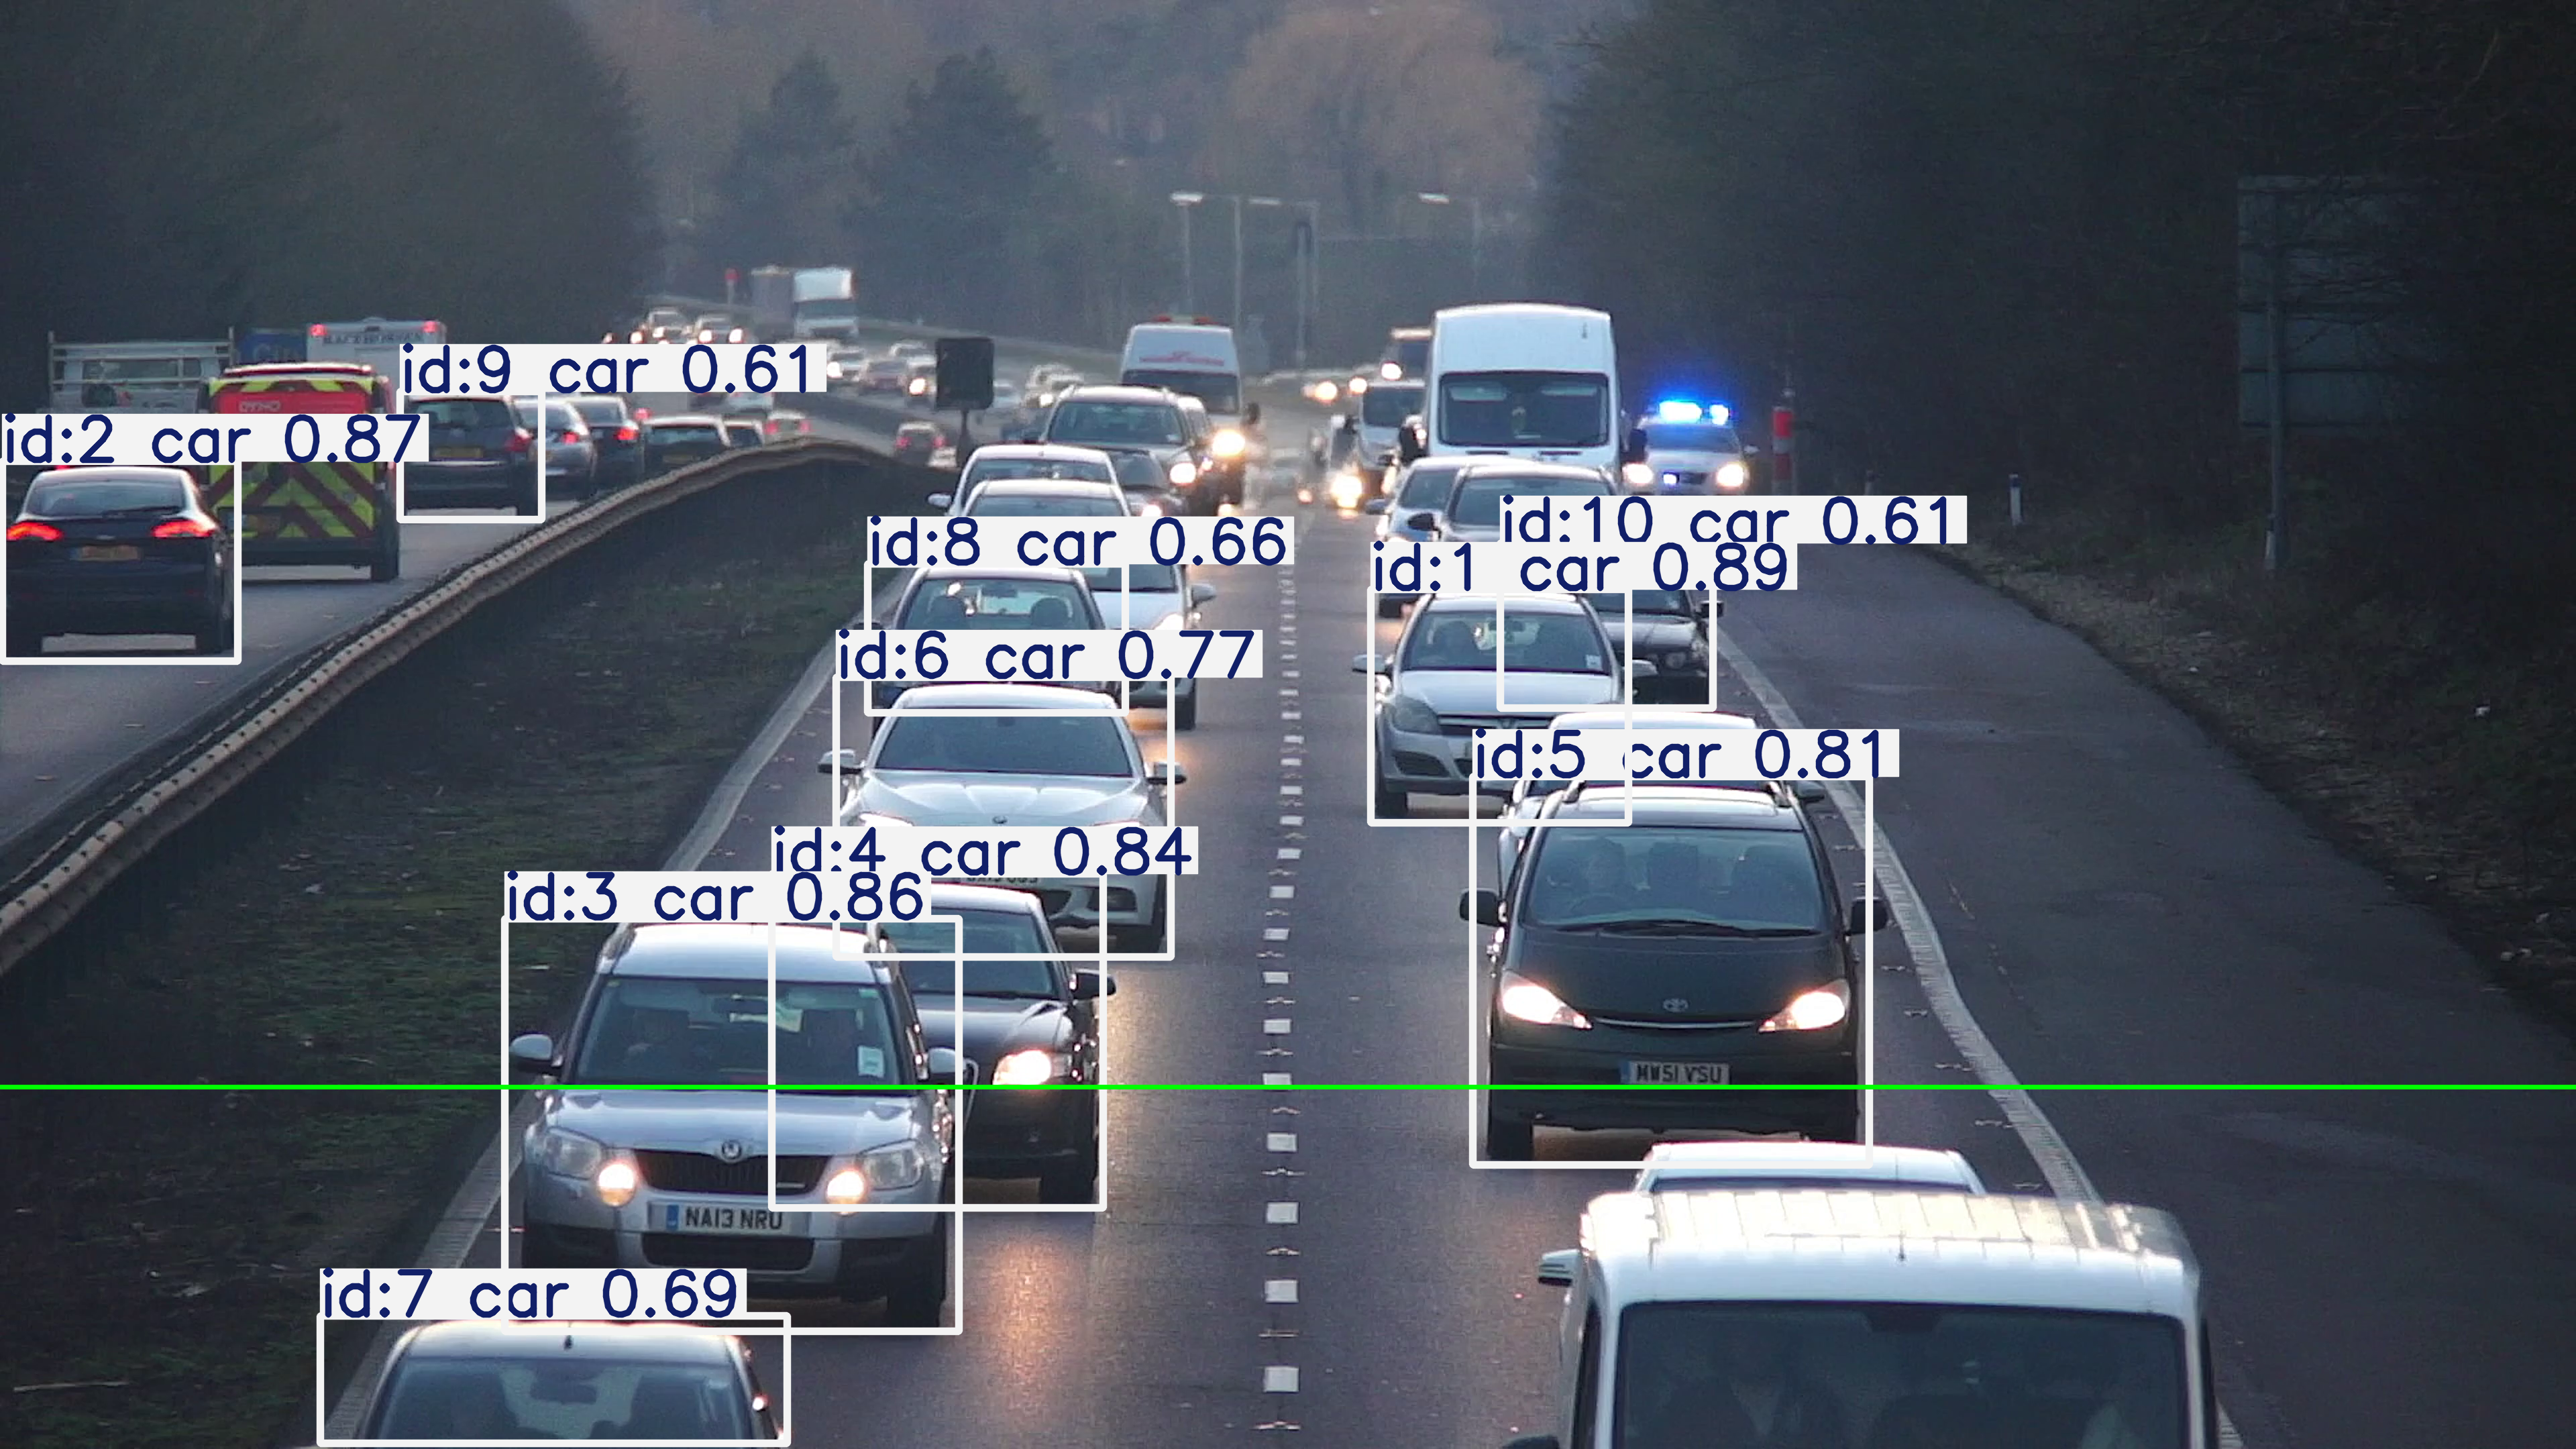

In [11]:
# Read a single frame
ret = True;

ret, frame = capture.read()
if ret:

  # Tracking with YOLO model
  res = model.track(frame, persist=True)
  processed_frame = res[0].plot()

  cv2.line(processed_frame, (0, line_position), (frame_width, line_position), (0, 255, 0), 5)

  # Vehicle Tracker Visualization
  for obj_id, obj_center in object_tracker.items():
      cv2.circle(processed_frame, obj_center, 5, (0, 0, 255), -1)  # Draw a red circle at object center

  # Display the processed frame
  cv2_imshow(processed_frame)

In [ ]:
# Tracking objects throughout the video and processing
ret = True
while ret:
    ret, frame = capture.read()
    if not ret:
        break

    # Tracking with YOLO model
    res = model.track(frame, persist=True)
    processed_frame = res[0].plot()

    cv2.line(processed_frame, (0, line_position), (frame_width, line_position), (0, 255, 0), 5)

    text = f"Entering: {vehicle_counter['entering']} | Exiting: {vehicle_counter['exiting']}"
    cv2.putText(processed_frame, text, (40, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 255), 2, cv2.LINE_AA)


    # Iterating over each detection in the frame
    for r in res:
        for obj in r.boxes:
            obj_id = obj.id.item()  # Object ID assigned by YOLO
            obj_center = (int(obj.xywh[0][0]), int(obj.xywh[0][1]))

            if obj_id in object_tracker:
                last_position = object_tracker[obj_id]

                # Checking if object has crossed the line
                if last_position[1] < line_position <= obj_center[1]:
                    vehicle_counter['entering'] += 1
                elif last_position[1] > line_position >= obj_center[1]:
                    vehicle_counter['exiting'] += 1

            object_tracker[obj_id] = obj_center

    # Writing processed frame to output video
    out.write(processed_frame)

capture.release()
out.release()
print(f"Processed video saved to {OUTPUT_PATH}")
print(f"Vehicles Entering: {vehicle_counter['entering']}, Vehicles Exiting: {vehicle_counter['exiting']}")

Processed video saved to ./processed_video.mp4
Vehicles Entering: 0, Vehicles Exiting: 0
